In [11]:
import numpy as np
weights = np.zeros((11591, 2))
wt_file = open('features.location')

In [12]:
i = 0
for line in wt_file.readlines():
    line = line.strip().split(' ')
    j = 0
    for word in line:
        weights[i][j] = word
        j += 1
    i += 1
weights.shape

(11591, 2)

In [13]:
# sanity check
print(weights[0])
print(weights[900])
print(type(weights[0][1]))

[0.09015111 0.10428671]
[0.09015935 0.10429004]
<class 'numpy.float64'>


In [21]:
# kmeans clustering on weights
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, random_state = 0, init = 'k-means++', max_iter = 500, n_init = 1).fit(weights)
labels = kmeans.labels_
print(len(labels))

11591


In [22]:
import pandas as pd
data = pd.read_csv('location.csv')
text, label = [], []
for i in data.index:
    text.append(data['DESCRIPTION'][i])
    label.append(data['CITY'][i])

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
label_ids = [0, 1, 2, 3, 4] # 5 labels
text_j = [] 
labels_dict = [] 
for i in range(5):
    dict_ = defaultdict(int)
    text_ = []
    labels_dict.append(dict_)
    text_j.append(text_)
    
for i in range(len(labels)):
    for j in label_ids:
        if labels[i] == j:
            text_j[j].append(text[i])
            labels_dict[j][label[i]] += 1    

In [25]:
cluster_cen = kmeans.cluster_centers_
cluster_cen

array([[0.09015585, 0.10428719],
       [0.0901516 , 0.10428944],
       [0.09016017, 0.10429146],
       [0.0901512 , 0.10428311],
       [0.09015528, 0.10429354]])

In [29]:
# based on max values in labels_dict
cluster_labels = ['Delhi', 'Mumbai', 'Other cities', 'Kathmandu', 'Nairobi']

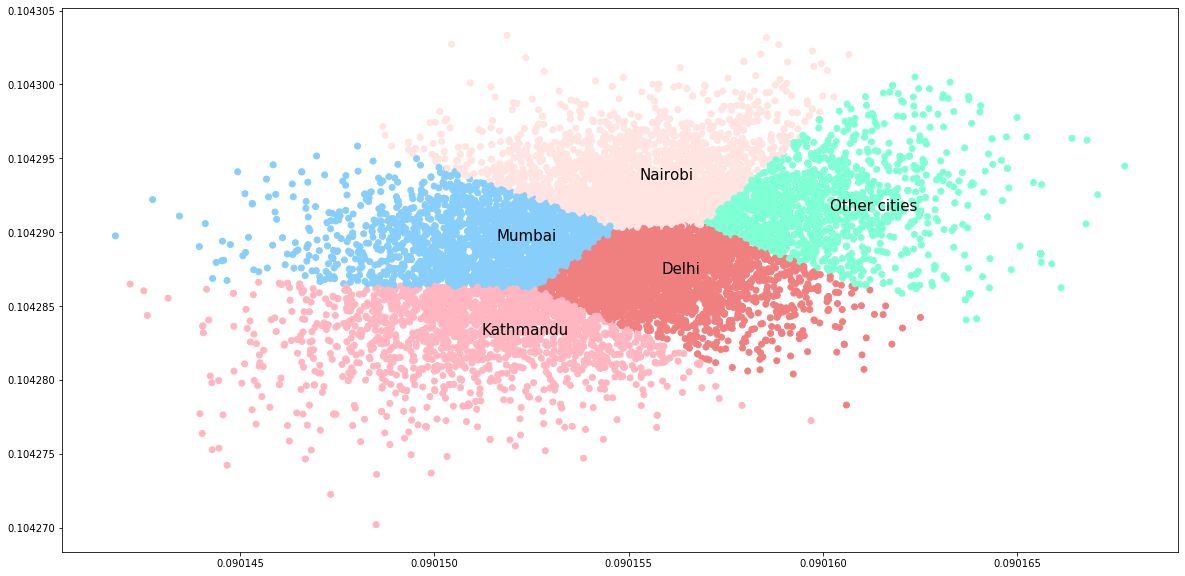

In [30]:
import matplotlib.pyplot as plt

colors = ["lightcoral", "lightskyblue", "aquamarine", "lightpink", "mistyrose"]
x_axis = [o[0] for o in weights]
y_axis = [o[1] for o in weights]

fig, ax = plt.subplots(figsize=(20,10))
ax.set_xbound(lower = 0.000050, upper = 0.000075)
ax.set_ybound(lower = 0.09508, upper = 0.09511)

ax.scatter(x_axis, y_axis, c = [colors[d] for d in labels])

for i, x in enumerate(cluster_labels):
    ax.annotate(x, (cluster_cen[i][0], cluster_cen[i][1]), fontsize = 15)

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
# top features for each cluster

for i in range(5):
    print("Top features for cluster ", i, " --- ", cluster_labels[i])
    vectorizer = TfidfVectorizer(max_features = 15, stop_words = 'english')  
    feat = vectorizer.fit_transform(text_j[i])
    print(vectorizer.get_feature_names())
    print()

Top features for cluster  0  ---  Delhi
['boys', 'bus', 'came', 'commenting', 'comments', 'evening', 'friend', 'girl', 'guy', 'guys', 'happened', 'man', 'men', 'started', 'walking']

Top features for cluster  1  ---  Mumbai
['boy', 'boys', 'bus', 'commenting', 'friend', 'girl', 'group', 'guy', 'home', 'man', 'school', 'started', 'station', 'touched', 'way']

Top features for cluster  2  ---  Other cities
['afternoon', 'bad', 'boys', 'commenting', 'comments', 'evening', 'girl', 'happened', 'men', 'place', 'road', 'started', 'street', 'touching', 'walking']

Top features for cluster  3  ---  Kathmandu
['boys', 'bus', 'commenting', 'friend', 'girl', 'going', 'guys', 'happened', 'home', 'man', 'old', 'started', 'touch', 'tried', 'way']

Top features for cluster  4  ---  Nairobi
['boy', 'boys', 'bus', 'commenting', 'evening', 'friend', 'girl', 'girls', 'group', 'guy', 'harassment', 'man', 'men', 'passing', 'started']

